In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time

In [24]:
df = pd.read_csv("resources/data/nab/nab_machine_temperature/NAB_machine_temperature_system_failure.csv")

In [25]:
df.head()

timestamp      value
0  2013-12-02 21:15:00  73.967322
1  2013-12-02 21:20:00  74.935882
2  2013-12-02 21:25:00  76.124162
3  2013-12-02 21:30:00  78.140707
4  2013-12-02 21:35:00  79.329836

In [26]:
len(df)

22695

In [27]:
class SetColAsIndex(TransformerMixin):
    def __init__(self, col):
        self.col = col

    def transform(self, X, **transform_params):
        X.index = X.loc[:, self.col].apply(lambda x: pd.to_datetime(x))
        return X

    def fit(self, X, y=None, **fit_params):
        return self
    
class SortTimeSeries(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X.sort_index()
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [28]:
process_pipeline = make_pipeline(SetColAsIndex('timestamp'),
                                SortTimeSeries())
df = process_pipeline.fit_transform(df)
df = df.drop('timestamp', 1)

In [29]:
df.tail()

value
timestamp                     
2014-02-19 15:05:00  98.185415
2014-02-19 15:10:00  97.804168
2014-02-19 15:15:00  97.135468
2014-02-19 15:20:00  98.056852
2014-02-19 15:25:00  96.903861

In [30]:
df['anomaly'] = 0
anomalies = ['2013-12-11 06:00:00', '2013-12-16 17:25:00', '2014-01-28 13:55:00', '2014-02-08 14:30:00']
for anomaly_date in anomalies:
    df.set_value(anomaly_date, 'anomaly', 1)

/Users/xiaolin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [31]:
rows = df[df.anomaly.isin([1])].itertuples()

In [32]:
for row in rows:
    print row[0], row[1], row[2]

2013-12-11 06:00:00 102.7362135 1
2013-12-16 17:25:00 2.084721206 1
2014-01-28 13:55:00 51.36715367 1
2014-02-08 14:30:00 25.88775208 1


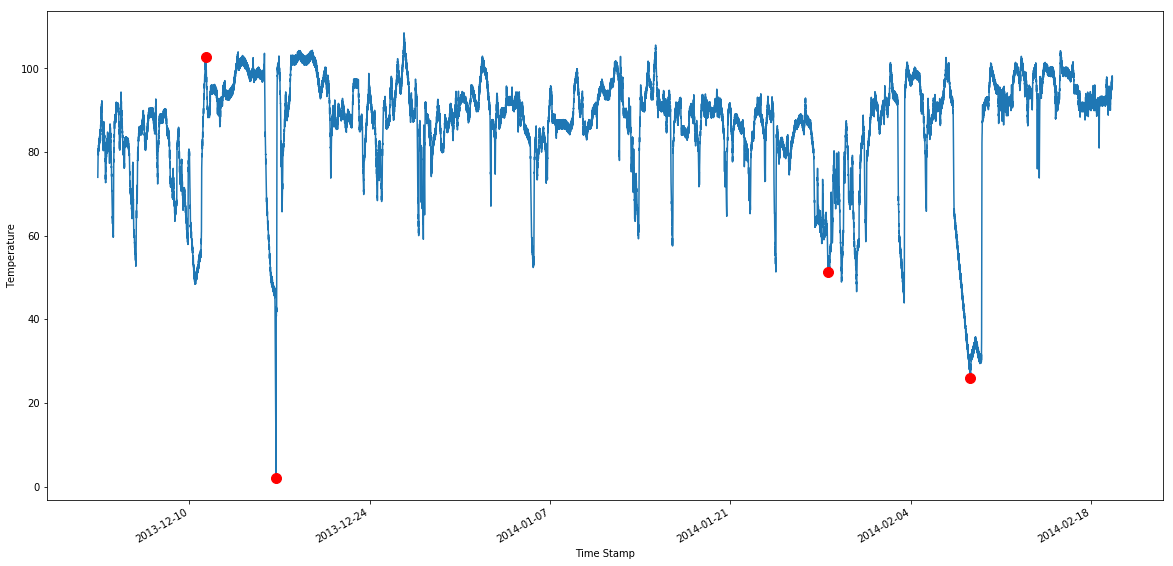

In [33]:
f1 = plt.figure(figsize = (20, 10))
df['value'].plot()
rows = df[df.anomaly.isin([1])].itertuples()
for row in rows:
    plt.plot(row[0], row[1], 'r.', markersize = 20)
plt.xlabel('Time Stamp')
plt.ylabel('Temperature')
plt.show()

In [42]:
df_test = df['2014-01-25':'2014-02-19']
df_train = df['2013-12-20':'2014-01-16']
df_validation = df['2014-01-17':'2014-01-24']

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation'] = df_validation

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

Size of test: 7386
Size of train: 8076
Size of validation: 2304
Total: 17766


In [43]:
for key in df_dict:
    np.save("resources/data/nab/nab_machine_temperature/%s"%(key),df_dict[key])